In [1]:
import numpy as np
import os
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
%matplotlib inline

In [2]:
from importlib import reload
import naive_keras
reload(naive_keras)
from naive_keras import Sequential, Conv2D, MaxPooling2D, ZeroPadding2D

In [3]:
model = Sequential(Conv2D(5, input_shape=(None, 20, 20, 3)),
                    MaxPooling2D(),
                    ZeroPadding2D(),
                    Conv2D(5))

In [4]:
x = np.random.randn(10,20,20,3)
y = model.predict(x)

In [5]:
model.layers[0].save_memory = True
model.layers[-1].save_memory = True
y2 = model.predict(x)

In [6]:
np.allclose(y, y2)

True

In [224]:
from importlib import reload
import naive_keras
reload(naive_keras)
from naive_keras import Sequential, Conv2D, MaxPooling2D, ZeroPadding2D

model = Sequential(ZeroPadding2D(input_shape=(None, 56, 56, 3)),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20))

model.folder = '/home/spi/nbs/input/train/'

In [225]:
model.summary()

,input_shape,output_shape
<class 'naive_keras.ZeroPadding2D'>,"(56, 56, 3)","(58, 58, 3)"
<class 'naive_keras.Conv2D'>,"(58, 58, 3)","(56, 56, 20)"
<class 'naive_keras.ZeroPadding2D'>,"(56, 56, 20)","(58, 58, 20)"
<class 'naive_keras.Conv2D'>,"(58, 58, 20)","(56, 56, 20)"
<class 'naive_keras.ZeroPadding2D'>,"(56, 56, 20)","(58, 58, 20)"
<class 'naive_keras.Conv2D'>,"(58, 58, 20)","(56, 56, 20)"
<class 'naive_keras.ZeroPadding2D'>,"(56, 56, 20)","(58, 58, 20)"
<class 'naive_keras.Conv2D'>,"(58, 58, 20)","(56, 56, 20)"
<class 'naive_keras.ZeroPadding2D'>,"(56, 56, 20)","(58, 58, 20)"
<class 'naive_keras.Conv2D'>,"(58, 58, 20)","(56, 56, 20)"


In [226]:
svms = model.initialize_by_SVM('/home/spi/nbs/input/train/', batch_size=20)

Round 0 of 20: 100.0% of the weights used
Round 1 of 20: 98.5% of the weights used
Round 2 of 20: 97.4% of the weights used
Round 3 of 20: 97.6% of the weights used
Round 4 of 20: 96.2% of the weights used
Round 5 of 20: 96.2% of the weights used
Round 6 of 20: 96.4% of the weights used
Round 7 of 20: 94.9% of the weights used
Round 8 of 20: 95.3% of the weights used
Round 9 of 20: 95.2% of the weights used
Round 10 of 20: 95.3% of the weights used
Round 11 of 20: 95.4% of the weights used
Round 12 of 20: 95.1% of the weights used
Round 13 of 20: 94.4% of the weights used
Round 14 of 20: 94.6% of the weights used
Round 15 of 20: 94.0% of the weights used
Round 16 of 20: 94.5% of the weights used
Round 17 of 20: 94.1% of the weights used
Round 18 of 20: 94.3% of the weights used
Round 19 of 20: 93.9% of the weights used
Round 0 of 20: 100.0% of the weights used
Round 1 of 20: 93.9% of the weights used
Round 2 of 20: 90.5% of the weights used
Round 3 of 20: 82.6% of the weights used
Roun

In [227]:
pics,labels = model.load_random_input(10, model.layers[0].input_shape[1:])

In [239]:
x = model.predict(pics, up_to_layer=model.layers[1])

In [228]:
y = model.predict(pics)

In [229]:
(y.reshape(-1,y.shape[-1])==0).mean(axis=0)

array([ 0.62920918,  0.33459821,  0.34132653,  0.31964286,  0.40149872,
        0.34470663,  0.47423469,  0.32850765,  0.32040816,  0.36374362,
        0.51581633,  0.49840561,  0.54288903,  0.49461097,  0.40516582,
        0.32987883,  0.43137755,  0.52720026,  0.57104592,  0.37464923])

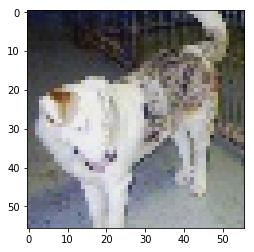

In [241]:
j = 3
plt.imshow(((pics[j]+2)*64).astype(np.uint8))

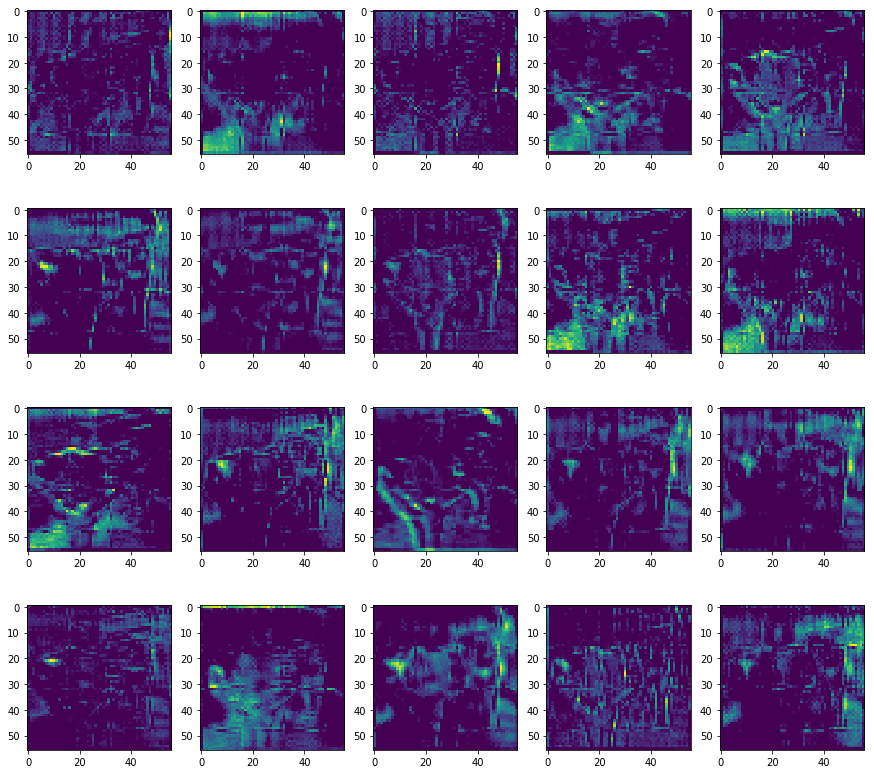

In [242]:
n = int(np.ceil(model.layers[1].output_shape[-1] / 5))
f, axes = plt.subplots(n,5,figsize=(15,3*n+2))
for i in range(model.layers[1].output_shape[-1]):
    axes[i//5,i%5].imshow(x[j,:,:,i])

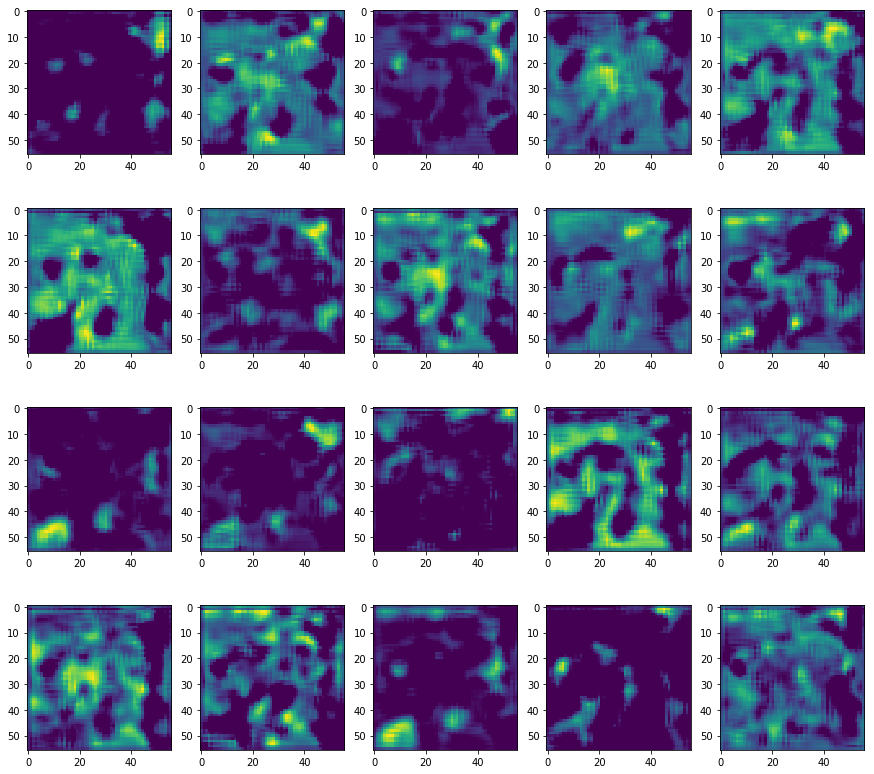

In [237]:
n = int(np.ceil(model.layers[-1].output_shape[-1] / 5))
f, axes = plt.subplots(n,5,figsize=(15,3*n+2))
for i in range(model.layers[-1].output_shape[-1]):
    if n > 1:
        axes[i//5,i%5].imshow(y[j,:,:,i])
    else:
        axes[i].imshow(y[j,:,:,i])

## It does *something*...
Now should implement a fully connected layer on top with usual softmax and backpropagation to check if it really learns anything. As it's just one FC layer it's a quadratic problem, SGD will work fine.

Probably can simply use sklearn.linear_model.SGDClassifier with partial_fit...